
https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

https://www.marsja.se/pandas-convert-column-to-datetime/

https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f

https://stackoverflow.com/questions/63040250/how-to-make-a-graph-plotting-monthly-data-over-many-years-in-pandas

https://earth-env-data-science.github.io/intro.html

https://towardsdatascience.com/rendering-images-inside-a-pandas-dataframe-3631a4883f60

https://www.marsja.se/pandas-convert-column-to-datetime/

https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/

% change: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

Between dates: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.between_time.html



# Final Project:


In [59]:

import pandas as pd
import numpy as np
import xarray as xr
import pooch
import datetime
from matplotlib import pyplot as plt
from matplotlib import style
from numpy import mean
from mpl_toolkits import mplot3d
# import cartopy
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import matplotlib.image as mpimg

plt.style.use("dark_background")

#%matplotlib inline
#%xmode Minimal

test = 1 + 1

test


2

# Reading CSV

In [2]:

df1 = pd.read_csv("CPTemp.csv")

df2 = pd.read_csv("EPAAll.csv")

df3 = pd.read_csv("EPAMicro.csv")

test 


2

# Confirming 

In [3]:

display(df1, df2, df3)


DATE      STATION                         NAME  TMAX  TMIN  TAVG  \
0      1-Jan-95  USW00094728  NY CITY CENTRAL PARK, NY US    53    38   NaN   
1      2-Jan-95  USW00094728  NY CITY CENTRAL PARK, NY US    46    26   NaN   
2      3-Jan-95  USW00094728  NY CITY CENTRAL PARK, NY US    32    23   NaN   
3      4-Jan-95  USW00094728  NY CITY CENTRAL PARK, NY US    35    19   NaN   
4      5-Jan-95  USW00094728  NY CITY CENTRAL PARK, NY US    27    15   NaN   
...         ...          ...                          ...   ...   ...   ...   
9824  24-Nov-21  USW00094728  NY CITY CENTRAL PARK, NY US    45    30   NaN   
9825  25-Nov-21  USW00094728  NY CITY CENTRAL PARK, NY US    56    39   NaN   
9826  26-Nov-21  USW00094728  NY CITY CENTRAL PARK, NY US    47    37   NaN   
9827  27-Nov-21  USW00094728  NY CITY CENTRAL PARK, NY US    39    34   NaN   
9828  28-Nov-21  USW00094728  NY CITY CENTRAL PARK, NY US    41    33   NaN   

      ACMH  ACSH  AWND  DASF  MDSF  PRCP  PSUN  SNOW  SNWD  TOBS   TSUN  WDMV  \
0      NaN   NaN   NaN   NaN   NaN  0.33   NaN   0.0   0.0   NaN  185.0   NaN   
1      NaN   NaN   NaN   NaN   NaN  0.35   NaN   0.0   0.0   NaN  170.0   NaN   
2      NaN   NaN   NaN   NaN   NaN  0.00   NaN   0.0   0.0   NaN  350.0   NaN   
3      NaN   NaN   NaN   NaN   NaN  0.00   NaN   0.0   0.0   NaN  532.0   NaN   
4      NaN   NaN   NaN   NaN   NaN  0.00   NaN   0.0   0.0   NaN  563.0   NaN   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
9824   NaN   NaN  4.70   NaN   NaN  0.00   NaN   0.0   0.0   NaN    NaN   NaN   
9825   NaN   NaN  2.46   NaN   NaN  0.01   NaN   0.0   0.0   NaN    NaN   NaN   
9826   NaN   NaN  9.62   NaN   NaN  0.12   NaN   0.0   0.0   NaN    NaN   NaN   
9827   NaN   NaN  8.05   NaN   NaN  0.00   NaN   0.0   0.0   NaN    NaN   NaN   
9828   NaN   NaN  2.24   NaN   NaN  0.00   NaN   0.0   0.0   NaN    NaN   NaN   

      WESD  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
...    ...  
9824   NaN  
9825   NaN  
9826   NaN  
9827   NaN  
9828   NaN  

[9829 rows x 19 columns]

Date  AQI_Value Main_Pollutant      Site_ID Site_Name  Source
0      1-Jan-1999         59            SO2  36-061-0056     PS 59     AQS
1      2-Jan-1999        102            SO2  36-061-0010       NaN     AQS
2      3-Jan-1999         41            SO2  36-061-0010       NaN     AQS
3      4-Jan-1999         62            SO2  36-061-0010       NaN     AQS
4      5-Jan-1999         61            SO2  36-061-0010       NaN     AQS
...           ...        ...            ...          ...       ...     ...
8368  29-Nov-2021         22          Ozone  36-061-0135      CCNY  AirNow
8369  30-Nov-2021         11          Ozone  36-061-0135      CCNY  AirNow
8370   1-Dec-2021         22          Ozone  36-061-0135      CCNY  AirNow
8371   2-Dec-2021         26          Ozone  36-061-0135      CCNY  AirNow
8372   3-Dec-2021         28          Ozone  36-061-0135      CCNY  AirNow

[8373 rows x 6 columns]

Date Source    Site ID  Daily_Mean_PM25_Concentration     UNITS  \
0      2-Jul-1999    AQS  360610056                           24.8  ug/m3 LC   
1      5-Jul-1999    AQS  360610056                           29.0  ug/m3 LC   
2      8-Jul-1999    AQS  360610056                           12.3  ug/m3 LC   
3     11-Jul-1999    AQS  360610056                            4.6  ug/m3 LC   
4     26-Jul-1999    AQS  360610056                           17.9  ug/m3 LC   
...           ...    ...        ...                            ...       ...   
6736  27-Oct-2021    AQS  360610115                            2.4  ug/m3 LC   
6737  28-Oct-2021    AQS  360610079                            4.8  ug/m3 LC   
6738  29-Oct-2021    AQS  360610135                            4.2  ug/m3 LC   
6739  30-Oct-2021    AQS  360610115                            4.6  ug/m3 LC   
6740  31-Oct-2021    AQS  360610115                            5.5  ug/m3 LC   

      DAILY_AQI                Site_Name  PERCENT_COMPLETE  \
0            78                    PS 59               100   
1            87                    PS 59               100   
2            51                    PS 59               100   
3            19                    PS 59               100   
4            63                    PS 59               100   
...         ...                      ...               ...   
6736         10  Intermediate School 143               100   
6737         20                    IS 45               100   
6738         18                     CCNY               100   
6739         19  Intermediate School 143               100   
6740         23  Intermediate School 143               100   

                          AQS_PARAMETER_DESC     STATE    COUNTY  \
0                   PM2.5 - Local Conditions  New York  New York   
1                   PM2.5 - Local Conditions  New York  New York   
2                   PM2.5 - Local Conditions  New York  New York   
3                   PM2.5 - Local Conditions  New York  New York   
4                   PM2.5 - Local Conditions  New York  New York   
...                                      ...       ...       ...   
6736  Acceptable PM2.5 AQI & Speciation Mass  New York  New York   
6737                PM2.5 - Local Conditions  New York  New York   
6738  Acceptable PM2.5 AQI & Speciation Mass  New York  New York   
6739  Acceptable PM2.5 AQI & Speciation Mass  New York  New York   
6740  Acceptable PM2.5 AQI & Speciation Mass  New York  New York   

      SITE_LATITUDE  SITE_LONGITUDE  
0          40.75912      -73.966610  
1          40.75912      -73.966610  
2          40.75912      -73.966610  
3          40.75912      -73.966610  
4          40.75912      -73.966610  
...             ...             ...  
6736       40.84955      -73.935649  
6737       40.79970      -73.934320  
6738       40.81976      -73.948250  
6739       40.84955      -73.935649  
6740       40.84955      -73.935649  

[6741 rows x 13 columns]

# Part I: Organizing DF

## Checking Type

In [4]:

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9829 entries, 0 to 9828
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     9829 non-null   object 
 1   STATION  9829 non-null   object 
 2   NAME     9829 non-null   object 
 3   TMAX     9829 non-null   int64  
 4   TMIN     9829 non-null   int64  
 5   TAVG     2648 non-null   float64
 6   ACMH     0 non-null      float64
 7   ACSH     0 non-null      float64
 8   AWND     9266 non-null   float64
 9   DASF     0 non-null      float64
 10  MDSF     0 non-null      float64
 11  PRCP     9829 non-null   float64
 12  PSUN     0 non-null      float64
 13  SNOW     9829 non-null   float64
 14  SNWD     8996 non-null   float64
 15  TOBS     0 non-null      float64
 16  TSUN     1060 non-null   float64
 17  WDMV     0 non-null      float64
 18  WESD     0 non-null      float64
dtypes: float64(14), int64(2), object(3)
memory usage: 1.4+ MB


## Changing Object to Date

In [5]:

df1["DATE"] = pd.to_datetime(df1["DATE"])

df2["Date"] = pd.to_datetime(df2["Date"])

df3["Date"] = pd.to_datetime(df3["Date"])

# Other Options:

# Datetime conversion using astype:
# df['Date'] = df['Date'].astype('datetime64[ns]')


# df = pd.read_csv('pandas_datetime_example.csv', index_col=0, parse_dates=[3])
# df.dtypes

# df = pd.read_csv('convert_pandas_column_to_datetime.csv', index_col=0, parse_dates=True)
# df.info()

test


2

In [6]:

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9829 entries, 0 to 9828
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     9829 non-null   datetime64[ns]
 1   STATION  9829 non-null   object        
 2   NAME     9829 non-null   object        
 3   TMAX     9829 non-null   int64         
 4   TMIN     9829 non-null   int64         
 5   TAVG     2648 non-null   float64       
 6   ACMH     0 non-null      float64       
 7   ACSH     0 non-null      float64       
 8   AWND     9266 non-null   float64       
 9   DASF     0 non-null      float64       
 10  MDSF     0 non-null      float64       
 11  PRCP     9829 non-null   float64       
 12  PSUN     0 non-null      float64       
 13  SNOW     9829 non-null   float64       
 14  SNWD     8996 non-null   float64       
 15  TOBS     0 non-null      float64       
 16  TSUN     1060 non-null   float64       
 17  WDMV     0 non-null      float64 

## Renaming Columns

In [7]:

df1.rename(columns = {"DATE": "Date", "TMAX": "TempMax", "TMIN" : "TempMin"}, inplace = True)

df2.rename(columns = {"AQI_Value" : "AQI"}, inplace = True)

df3.rename(columns = {"Daily_Mean_PM25_Concentration" : "pm2.5"}, inplace = True);


In [8]:

df1.head()


Date      STATION                         NAME  TempMax  TempMin  \
0 1995-01-01  USW00094728  NY CITY CENTRAL PARK, NY US       53       38   
1 1995-01-02  USW00094728  NY CITY CENTRAL PARK, NY US       46       26   
2 1995-01-03  USW00094728  NY CITY CENTRAL PARK, NY US       32       23   
3 1995-01-04  USW00094728  NY CITY CENTRAL PARK, NY US       35       19   
4 1995-01-05  USW00094728  NY CITY CENTRAL PARK, NY US       27       15   

   TAVG  ACMH  ACSH  AWND  DASF  MDSF  PRCP  PSUN  SNOW  SNWD  TOBS   TSUN  \
0   NaN   NaN   NaN   NaN   NaN   NaN  0.33   NaN   0.0   0.0   NaN  185.0   
1   NaN   NaN   NaN   NaN   NaN   NaN  0.35   NaN   0.0   0.0   NaN  170.0   
2   NaN   NaN   NaN   NaN   NaN   NaN  0.00   NaN   0.0   0.0   NaN  350.0   
3   NaN   NaN   NaN   NaN   NaN   NaN  0.00   NaN   0.0   0.0   NaN  532.0   
4   NaN   NaN   NaN   NaN   NaN   NaN  0.00   NaN   0.0   0.0   NaN  563.0   

   WDMV  WESD  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN

In [9]:

df2.head()


Date  AQI Main_Pollutant      Site_ID Site_Name Source
0 1999-01-01   59            SO2  36-061-0056     PS 59    AQS
1 1999-01-02  102            SO2  36-061-0010       NaN    AQS
2 1999-01-03   41            SO2  36-061-0010       NaN    AQS
3 1999-01-04   62            SO2  36-061-0010       NaN    AQS
4 1999-01-05   61            SO2  36-061-0010       NaN    AQS

In [10]:

df3.head()


Date Source    Site ID  pm2.5     UNITS  DAILY_AQI Site_Name  \
0 1999-07-02    AQS  360610056   24.8  ug/m3 LC         78     PS 59   
1 1999-07-05    AQS  360610056   29.0  ug/m3 LC         87     PS 59   
2 1999-07-08    AQS  360610056   12.3  ug/m3 LC         51     PS 59   
3 1999-07-11    AQS  360610056    4.6  ug/m3 LC         19     PS 59   
4 1999-07-26    AQS  360610056   17.9  ug/m3 LC         63     PS 59   

   PERCENT_COMPLETE        AQS_PARAMETER_DESC     STATE    COUNTY  \
0               100  PM2.5 - Local Conditions  New York  New York   
1               100  PM2.5 - Local Conditions  New York  New York   
2               100  PM2.5 - Local Conditions  New York  New York   
3               100  PM2.5 - Local Conditions  New York  New York   
4               100  PM2.5 - Local Conditions  New York  New York   

   SITE_LATITUDE  SITE_LONGITUDE  
0       40.75912       -73.96661  
1       40.75912       -73.96661  
2       40.75912       -73.96661  
3       40.75912       -73.96661  
4       40.75912       -73.96661

## Cleaning Up DataFrame | Removing Columns & Rows

## Dropping Columns

In [11]:

df1.drop(columns = df1.columns[[1, 2]], inplace = True)
df1.drop(columns = df1.columns[3:18], inplace = True)

df2.drop(columns = df2.columns[[2, 3, 4, 5]], inplace = True)

df3.drop(columns = df3.columns[[1, 2, 5, 6, 7, 8, 9, 10, 11, 12]], inplace = True)


In [12]:

display(df1, df2, df3)


Date  TempMax  TempMin
0    1995-01-01       53       38
1    1995-01-02       46       26
2    1995-01-03       32       23
3    1995-01-04       35       19
4    1995-01-05       27       15
...         ...      ...      ...
9824 2021-11-24       45       30
9825 2021-11-25       56       39
9826 2021-11-26       47       37
9827 2021-11-27       39       34
9828 2021-11-28       41       33

[9829 rows x 3 columns]

Date  AQI
0    1999-01-01   59
1    1999-01-02  102
2    1999-01-03   41
3    1999-01-04   62
4    1999-01-05   61
...         ...  ...
8368 2021-11-29   22
8369 2021-11-30   11
8370 2021-12-01   22
8371 2021-12-02   26
8372 2021-12-03   28

[8373 rows x 2 columns]

Date  pm2.5     UNITS
0    1999-07-02   24.8  ug/m3 LC
1    1999-07-05   29.0  ug/m3 LC
2    1999-07-08   12.3  ug/m3 LC
3    1999-07-11    4.6  ug/m3 LC
4    1999-07-26   17.9  ug/m3 LC
...         ...    ...       ...
6736 2021-10-27    2.4  ug/m3 LC
6737 2021-10-28    4.8  ug/m3 LC
6738 2021-10-29    4.2  ug/m3 LC
6739 2021-10-30    4.6  ug/m3 LC
6740 2021-10-31    5.5  ug/m3 LC

[6741 rows x 3 columns]

## Set Index as Date | Remove Rows Based on Dates

In [13]:

df1.set_index("Date")
df2.set_index("Date")
df3.set_index("Date");


#df11 = df1[(df1['Date']> "2018-01-01") & (df1['Date']< "2021-11-28")]

df1.drop(df1.index[df1.Date.between("1995-01-01", "1999-07-01")], inplace = True)
df1.drop(df1.index[df1.Date.between("2021-11-01", "2021-11-28")], inplace = True)

df2.drop(df2.index[df2.Date.between("1999-01-01", "1999-07-01")], inplace = True)
df2.drop(df2.index[df2.Date.between("2021-11-01", "2021-12-03")], inplace = True)



# df1.drop(df1.index[0:1643], inplace = True);
# df1.drop(df1.index[9802:9829], inplace = True);

# df2.drop(df2.index[0:182], inplace = True);
# df2.drop(df2.index[8340:8373], inplace = True);


In [14]:

display(df1, df2, df3)


Date  TempMax  TempMin
1643 1999-07-02       86       75
1644 1999-07-03       87       74
1645 1999-07-04       96       79
1646 1999-07-05      101       82
1647 1999-07-06      101       83
...         ...      ...      ...
9796 2021-10-27       61       53
9797 2021-10-28       57       49
9798 2021-10-29       56       47
9799 2021-10-30       64       53
9800 2021-10-31       63       55

[8158 rows x 3 columns]

Date  AQI
182  1999-07-02   78
183  1999-07-03  159
184  1999-07-04   66
185  1999-07-05   87
186  1999-07-06  126
...         ...  ...
8335 2021-10-27   10
8336 2021-10-28   21
8337 2021-10-29   29
8338 2021-10-30   26
8339 2021-10-31   23

[8158 rows x 2 columns]

Date  pm2.5     UNITS
0    1999-07-02   24.8  ug/m3 LC
1    1999-07-05   29.0  ug/m3 LC
2    1999-07-08   12.3  ug/m3 LC
3    1999-07-11    4.6  ug/m3 LC
4    1999-07-26   17.9  ug/m3 LC
...         ...    ...       ...
6736 2021-10-27    2.4  ug/m3 LC
6737 2021-10-28    4.8  ug/m3 LC
6738 2021-10-29    4.2  ug/m3 LC
6739 2021-10-30    4.6  ug/m3 LC
6740 2021-10-31    5.5  ug/m3 LC

[6741 rows x 3 columns]

## Resetting Index

In [15]:

df1.reset_index(drop = True, inplace = True)
df2.reset_index(drop = True, inplace = True)
df3.reset_index(drop = True, inplace = True)


## Merging All DF Into One

In [16]:

df4 = df1.merge(df2, on = "Date").merge(df3, on = "Date")


In [17]:

df4


Date  TempMax  TempMin  AQI  pm2.5     UNITS
0    1999-07-02       86       75   78   24.8  ug/m3 LC
1    1999-07-05      101       82   87   29.0  ug/m3 LC
2    1999-07-08       87       72   51   12.3  ug/m3 LC
3    1999-07-11       83       61   38    4.6  ug/m3 LC
4    1999-07-26       93       75  105   17.9  ug/m3 LC
...         ...      ...      ...  ...    ...       ...
6736 2021-10-27       61       53   10    2.4  ug/m3 LC
6737 2021-10-28       57       49   21    4.8  ug/m3 LC
6738 2021-10-29       56       47   29    4.2  ug/m3 LC
6739 2021-10-30       64       53   26    4.6  ug/m3 LC
6740 2021-10-31       63       55   23    5.5  ug/m3 LC

[6741 rows x 6 columns]

## Adding a New Column: Temperature Average

In [18]:

df4["TempAvg"] = df4[["TempMax", "TempMin"]].mean(axis = 1)

df4


Date  TempMax  TempMin  AQI  pm2.5     UNITS  TempAvg
0    1999-07-02       86       75   78   24.8  ug/m3 LC     80.5
1    1999-07-05      101       82   87   29.0  ug/m3 LC     91.5
2    1999-07-08       87       72   51   12.3  ug/m3 LC     79.5
3    1999-07-11       83       61   38    4.6  ug/m3 LC     72.0
4    1999-07-26       93       75  105   17.9  ug/m3 LC     84.0
...         ...      ...      ...  ...    ...       ...      ...
6736 2021-10-27       61       53   10    2.4  ug/m3 LC     57.0
6737 2021-10-28       57       49   21    4.8  ug/m3 LC     53.0
6738 2021-10-29       56       47   29    4.2  ug/m3 LC     51.5
6739 2021-10-30       64       53   26    4.6  ug/m3 LC     58.5
6740 2021-10-31       63       55   23    5.5  ug/m3 LC     59.0

[6741 rows x 7 columns]

## Checking for NAN/ Missing Values

In [19]:

df4.isnull().values.any()

#df4.isnull();

#df1.fillna(method ='pad')
# df1.fillna(method = 'ffill', inplace = True)


False

# Part II: Working with DF | Plots

## Temp Min x Max Plot

/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


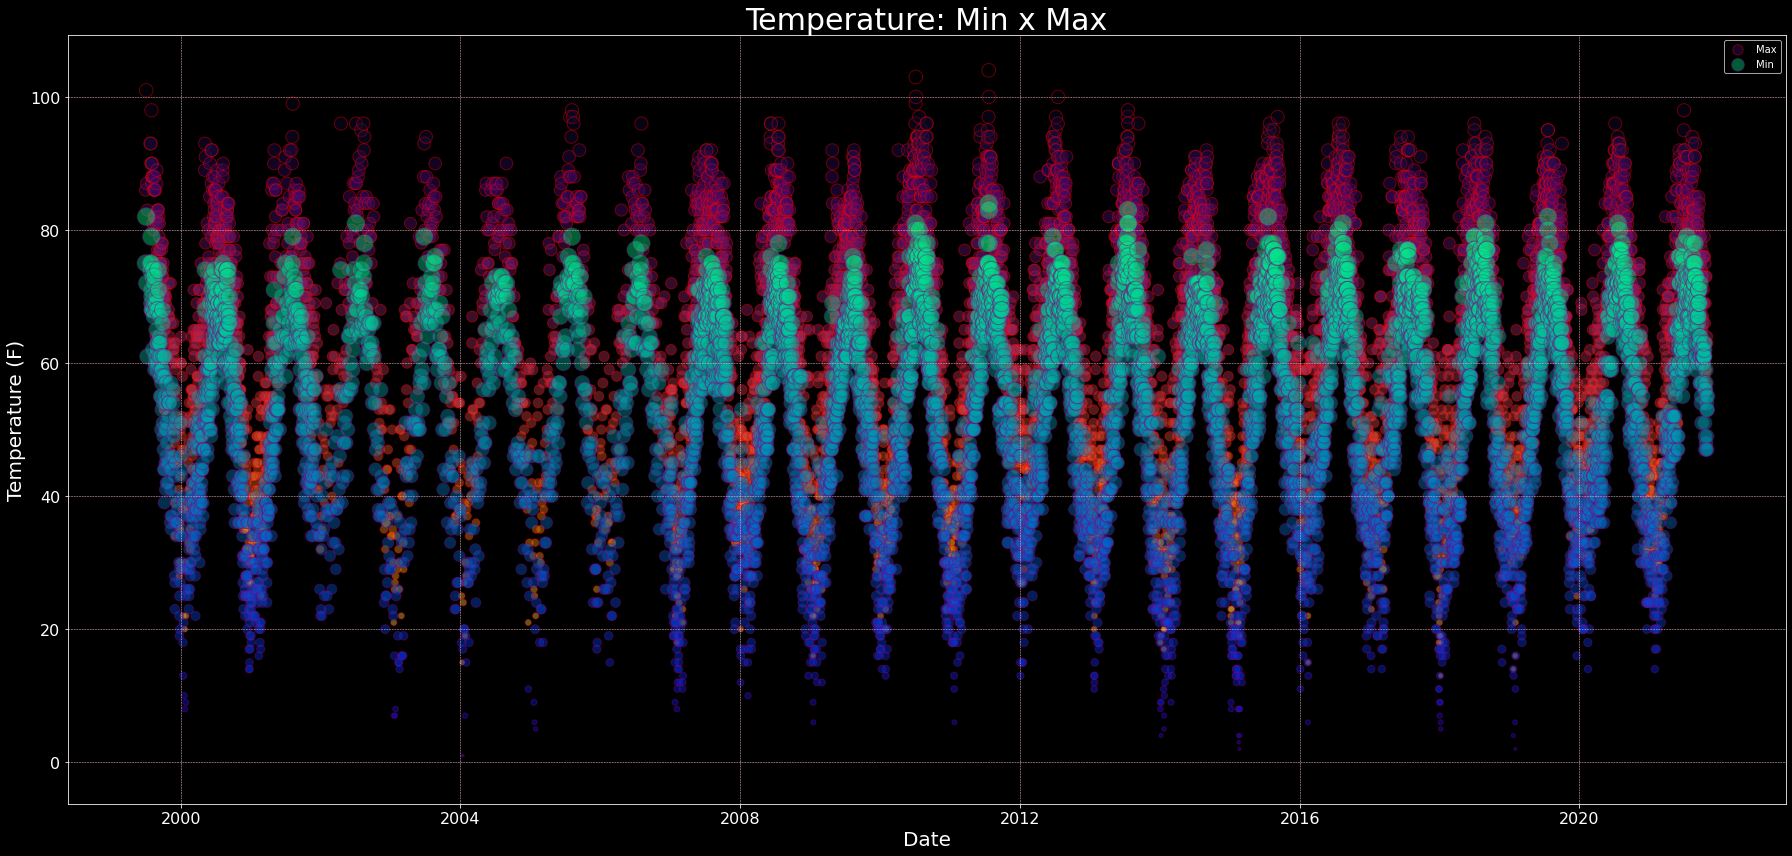

In [20]:

fig, ax = plt.subplots(figsize = (25, 12))

#months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

ax.scatter(df4.Date, df4.TempMax, s = (df4.TempMax * 1.8),
    c = (df4.TempMax * 4),
    cmap = "inferno_r",
    #cmap = "autumn_r",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "red"
)

ax.scatter(df4.Date, df4.TempMin, s = (df4.TempMin * 4),
    c = (df4.TempMin * 4),
    cmap = "winter",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "purple"
)

ax.legend(['Max', 'Min'])
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Temperature (F)", fontsize = 20)
ax.set_title("Temperature: Min x Max", fontsize = 30)

ax.grid(color= "pink", linestyle= '--', linewidth = .5)
ax.tick_params(axis = "x", labelsize=16)
ax.tick_params(axis='y', labelsize=16)

fig.tight_layout()

plt.show();


####################################################################################################################################

# Other Options:

#df4.plot(x = 'Date', y = "TempMax", kind = "scatter", figsize = (40, 15), color= "yellow", s = df4.TempMax * .5, grid = True)
#df4.plot!(x = 'Date', y = "TempMin", kind = "scatter", figsize = (40, 15), color= "yellow", s = df4.TempMax  *2)


####################

#ax = df4.plot.scatter(x = 'Date', y = "TempMax", color = "DarkBlue", label = "Group 1")

# df4.plot.scatter(x = 'Date', y = "TempMin", color = "DarkGreen", label = "Group 2", ax = ax)


## Temp Avg | Histogram Min Max Occurences

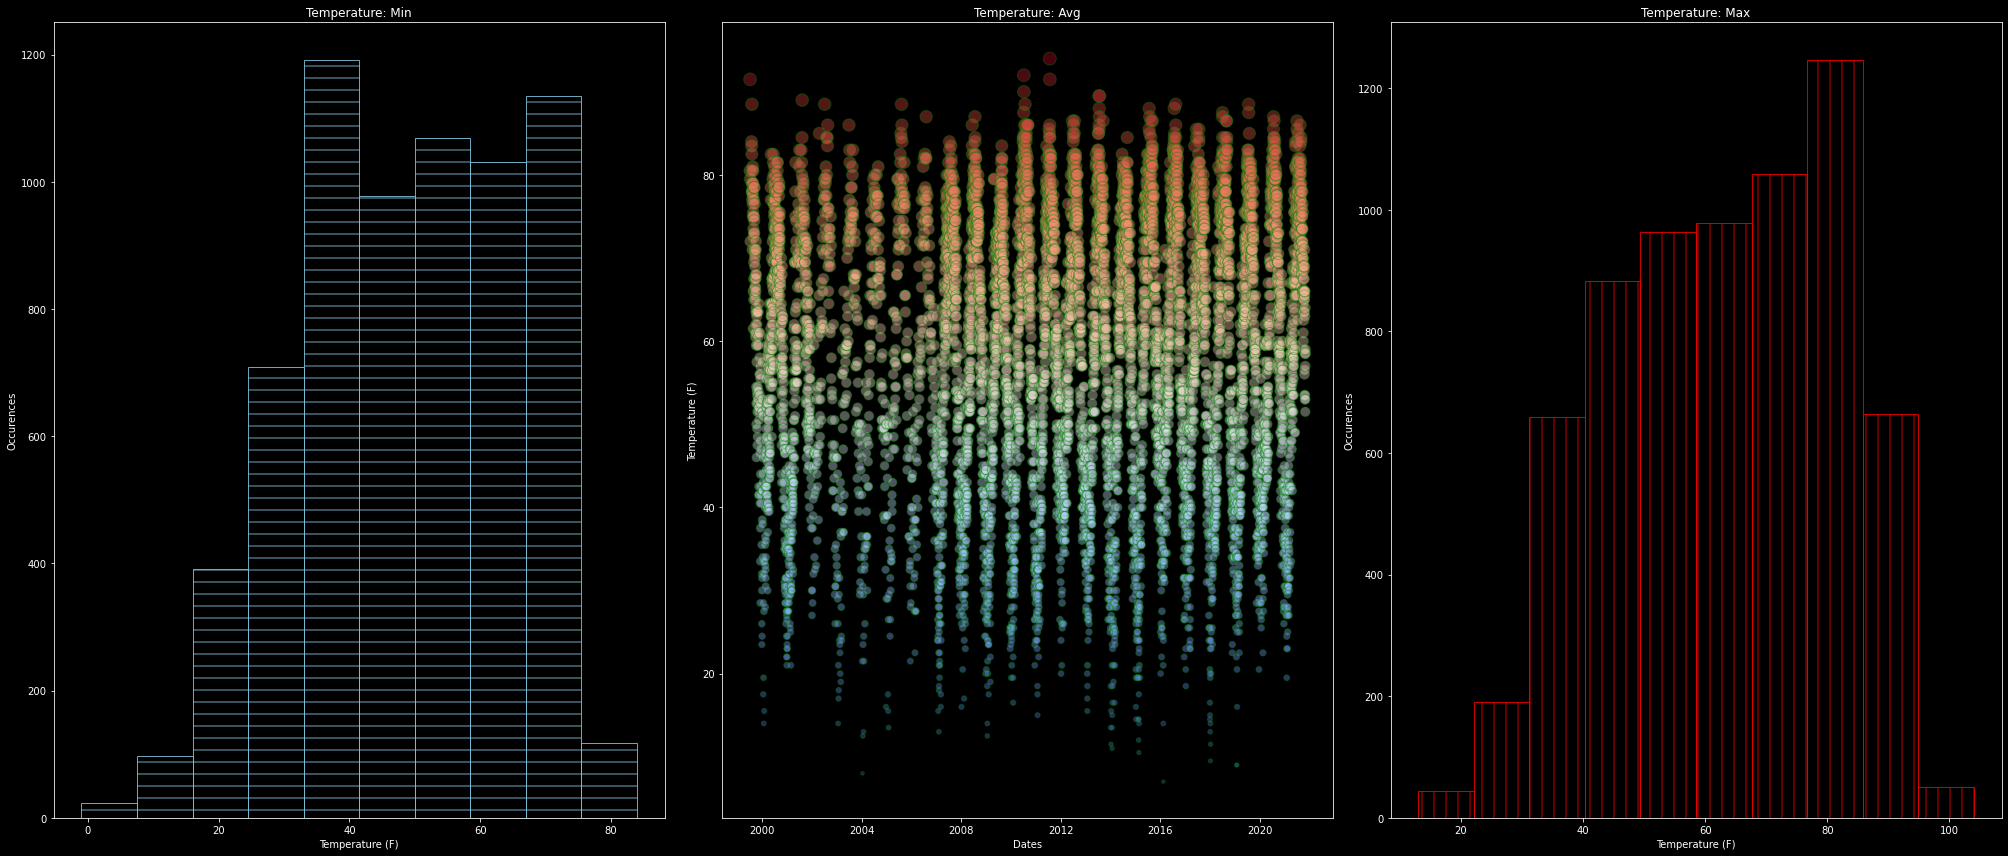

In [21]:

fig, ax = plt.subplots(1,3, figsize = (28, 12)) #, squeeze = False)

ax[0].hist(df4.TempMin,
    bins = 10,
    #color = "skyblue", 
    ec = "skyblue",
    lw = 1,
    alpha = 0.8,
    color = "black",
    hatch = "-"           
)

ax[0].set_xlabel('Temperature (F)')
ax[0].set_ylabel('Occurences')
ax[0].set_title('Temperature: Min')

ax[1].scatter(df4.Date, df4.TempAvg, s = (df4.TempAvg * 1.8),
    c = (df4.TempAvg * 1.8),
    cmap = "coolwarm",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "green",
)

ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Temperature (F)')
ax[1].set_title('Temperature: Avg')

ax[2].hist(df4.TempMax, 
           bins = 10, 
            ec = "red",
            lw = 1,
            alpha = 0.8,
        color = "black",
           hatch = "|",
)

ax[2].set_xlabel('Temperature (F)')
ax[2].set_ylabel('Occurences')
ax[2].set_title('Temperature: Max')

# use the previously defined function

plt.tight_layout()
plt.show()


## EPA AQI Chart

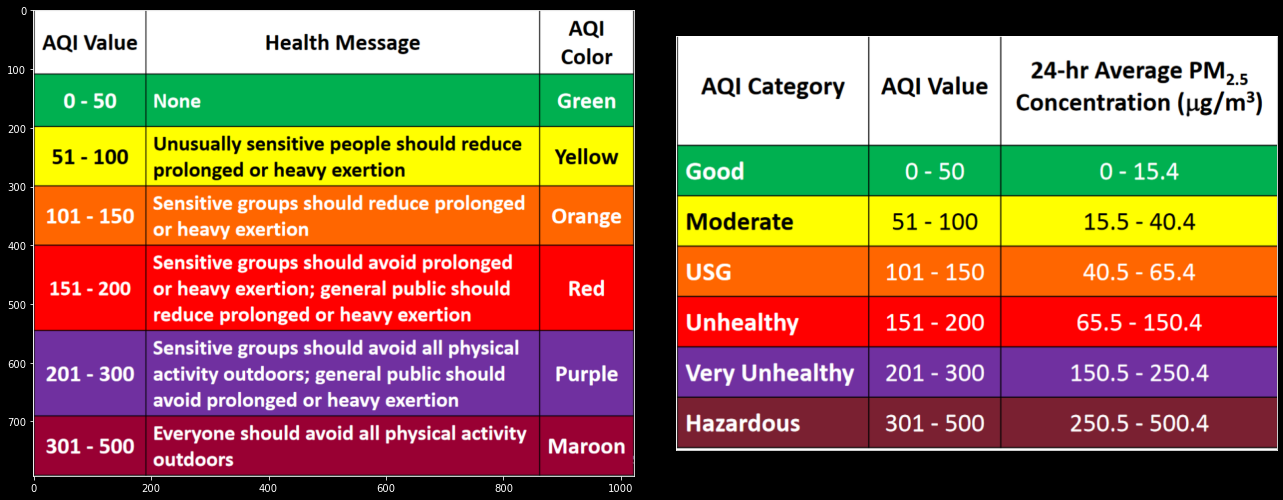

In [22]:

fig, ax = plt.subplots(1, 2, figsize = (18, 8))#, squeeze = False)

img = mpimg.imread('aqi.png')
imgi = mpimg.imread('epa.png')

plt.tight_layout()
plt.xticks([])
plt.yticks([])

ax[0].imshow(img)
ax[1].imshow(imgi);


## Daily AQI Plot

In [23]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.Date, df4.AQI, s = (df4.AQI * 1.4),
#     c = (df4.AQI * 4),
#     #cmap = "viridis_r",
#     #cmap = "gist_stern_r",
#     cmap = "brg_r",
#     #cmap = "autumn_r",
#     alpha = 0.65,
#     #linewidths = None,
#     edgecolors = "red"
# )

# # ax.scatter(df4.Date, df4.TempMin, s = (df4.TempMin * 4),
# #     c = (df4.TempMin * 4),
# #     cmap = "winter",
# #     alpha = 0.4,
# #     #linewidths = None,
# #     edgecolors = "blue"
# # )

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("AQI", fontsize = 20)
# ax.set_title("Daily AQI", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()
# plt.show();


## Daily PM Concentration Plot

In [24]:

# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.Date, df4["pm2.5"], s = (df4.AQI * 1.9),
#     c = (df4.AQI * 2),
#     #cmap = "tab20b",
#     #cmap = "terrain",
#     #cmap = "afmhot_r",
#     cmap = "bone",
#     #cmap = "autumn_r",
#     alpha = 0.65,
#     #linewidths = None,
#     edgecolors = "green"
# )

# # ax.scatter(df4.Date, df4.TempMin, s = (df4.TempMin * 4),
# #     c = (df4.TempMin * 4),
# #     cmap = "winter",
# #     alpha = 0.4,
# #     #linewidths = None,
# #     edgecolors = "blue"
# # )

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("PM Concentration (ug/m^3)", fontsize = 20)
# ax.set_title("Daily PM Concentration", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()
# plt.show();


In [25]:

# fig, ax = plt.subplots(1,2, figsize = (25, 12), sharex = True, sharey = False)#, squeeze = False)

# fig.suptitle("Daily AQI x PM", fontsize = 18)

# fig.subplots_adjust(top=0.78)    

# #############################################################################

# ax[0].scatter(df4.Date, df4.AQI, s = (df4.TempMin * 1.8),
#     c = (df4.TempMin * 4),
#     #cmap = "inferno_r",
#     #cmap = "autumn_r",
#     cmap = "coolwarm",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "navy"
# )

# ax[0].set_xlabel("Date", fontsize = 15)
# ax[0].set_ylabel("AQI", fontsize = 15)
# ax[0].set_title("AQI", fontsize = 15)
# ax[0].grid(color = "pink", linestyle= '--', linewidth = .5)


# #############################################################################

# ax[1].scatter(df4.Date,  df4["pm2.5"], s = (df4.TempAvg * 1.8),
#     c = (df4.TempAvg * 1.8),
#     cmap = "coolwarm",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "blue",
# )

# ax[1].set_xlabel("Date", fontsize = 15)
# ax[1].set_ylabel("PM", fontsize = 15)
# ax[1].set_title('PM', fontsize = 15)
# ax[1].grid(color = "pink", linestyle= '--', linewidth = .5)


# #############################################################################

# plt.tight_layout()
# plt.show()


## PLot Daily AQI, PM, Temperature

In [57]:

# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.Date, df4.AQI, s = (df4.AQI * 1.8),
#     c = "purple",# (df4.AQI * 4),
#     #cmap = "bone",
#     #cmap = "autumn_r",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "pink"
# )

# ax.scatter(df4.Date, df4["pm2.5"], s = ( df4["pm2.5"] * 1.8),
#     c = "gold", #( df4["pm2.5"] * 4),
#     #cmap = "brg_r",
#     alpha = 0.5,
#     #linewidths = None,
#     edgecolors = "red"
# )


# ax.legend(['AQI', 'PM Concentration',  "Temperature",])

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("AQI | PM Count", fontsize = 20)
# ax.set_title("Daily AQI & PM Concentration", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


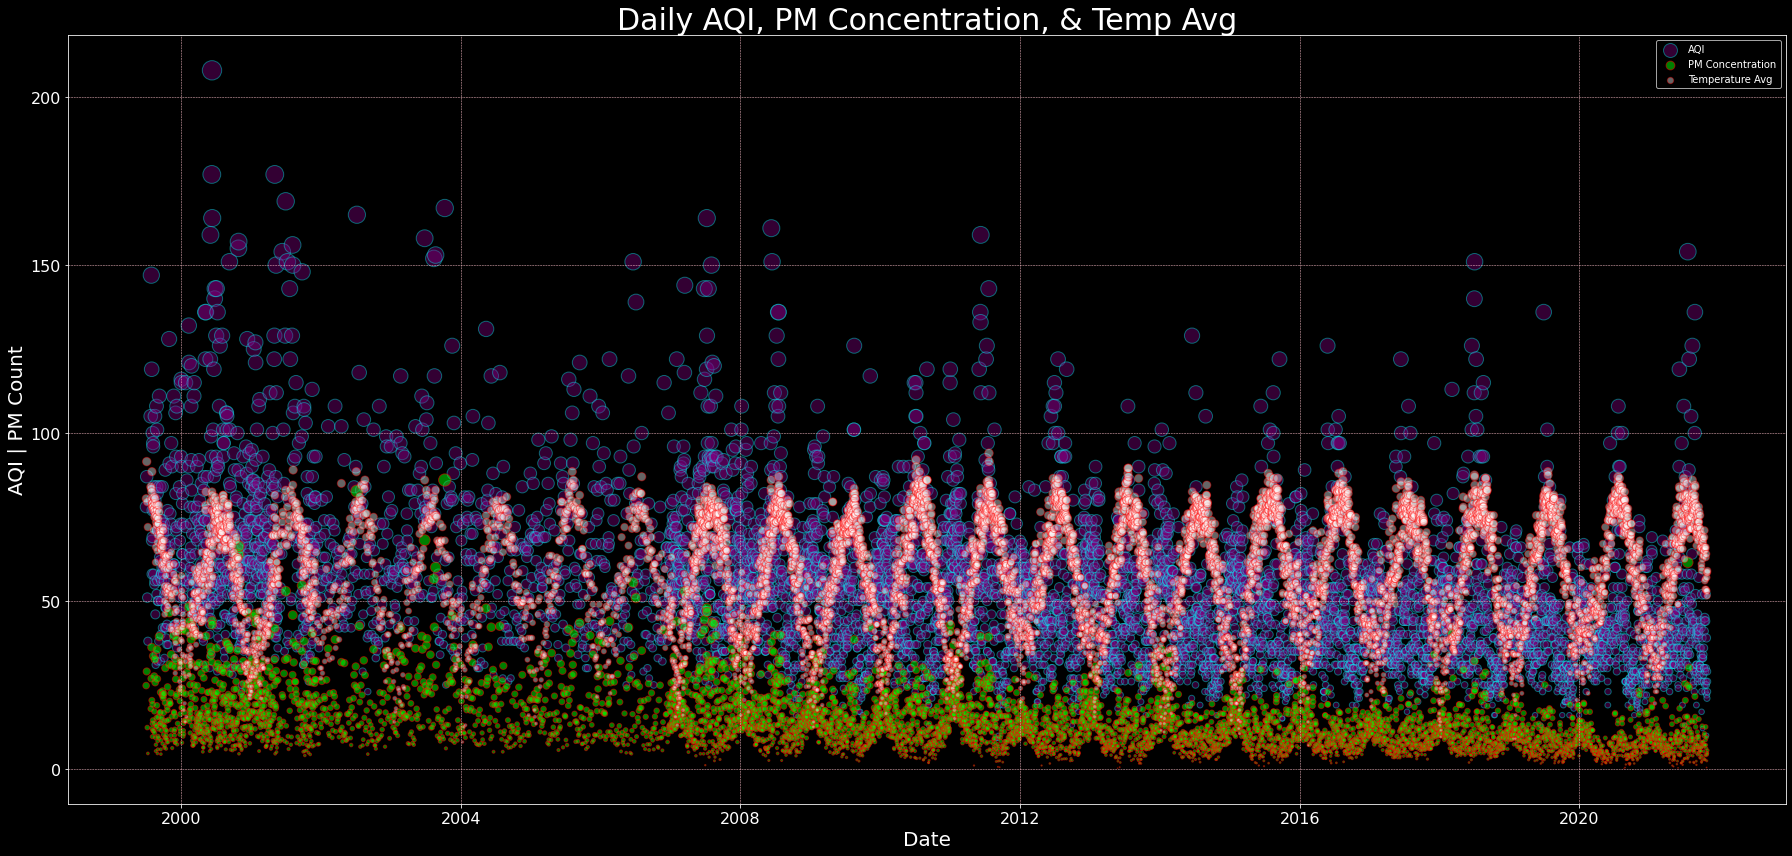

In [58]:

fig, ax = plt.subplots(figsize = (25, 12))

#months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

ax.scatter(df4.Date, df4.AQI, s = (df4.AQI * 1.8),
    c = "purple",# (df4.AQI * 4),
    #cmap = "bone",
    #cmap = "autumn_r",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "cyan"
)

ax.scatter(df4.Date, df4["pm2.5"], s = ( df4["pm2.5"] * 1.8),
    c = "lime", #( df4["pm2.5"] * 4),
    #cmap = "brg_r",
    alpha = 0.5,
    #linewidths = None,
    edgecolors = "red"
)

ax.scatter(df4.Date, df4["TempAvg"], s = ( df4["TempAvg"] * .8),
    c = "white", #( df4["pm2.5"] * 4),
    #cmap = "brg_r",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "red"
)

ax.legend(['AQI', 'PM Concentration', "Temperature Avg"])

ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("AQI | PM Count", fontsize = 20)
ax.set_title("Daily AQI, PM Concentration, & Temp Avg", fontsize = 30)

ax.grid(color= "pink", linestyle= '--', linewidth = .5)
ax.tick_params(axis = "x", labelsize=16)
ax.tick_params(axis='y', labelsize=16)

fig.tight_layout()

plt.show();


## Histogram: AQI | PM

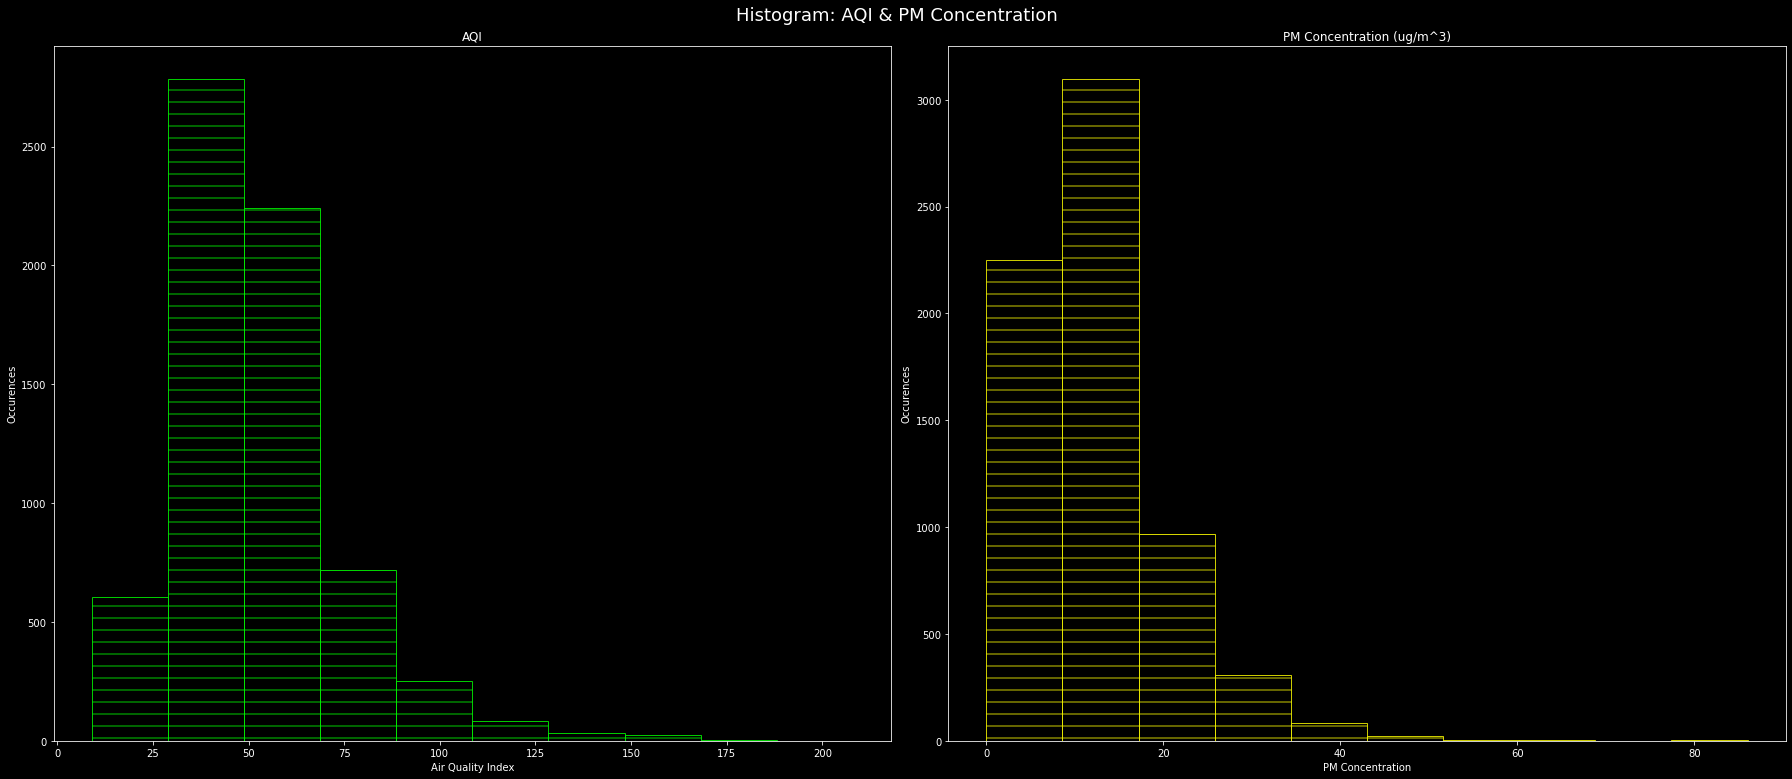

In [28]:

fig, ax = plt.subplots(1, 2, figsize = (25, 11)) #, squeeze = False)

fig.suptitle("Histogram: AQI & PM Concentration", fontsize = 18)
fig.subplots_adjust(top=0.78)    

ax[0].hist(df4.AQI,
    bins = 10,
    #color = "skyblue", 
    ec = "lime",
    lw = 1,
    alpha = 0.8,
    color = "black",
    hatch = "-"           
)

ax[0].set_xlabel("Air Quality Index")
ax[0].set_ylabel('Occurences')
ax[0].set_title("AQI")

ax[1].hist(df4["pm2.5"], 
           bins = 10, 
            ec = "yellow",
            lw = 1,
            alpha = 0.8,
        color = "black",
           hatch = "-",
)

ax[1].set_xlabel("PM Concentration")
ax[1].set_ylabel('Occurences')
ax[1].set_title("PM Concentration (ug/m^3)")

# use the previously defined function

plt.tight_layout()
plt.show()


## 2D Histogram

In [29]:
# fig, ax = plt.subplots(1,2, figsize = (40, 15))#, squeeze = False)


# cm = plt.cm.get_cmap('RdYlBu_r')

# ax[0].hist2d(df4["pm2.5"], df4.TempAvg, 
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"           
# )

# ax[0].set_xlabel('Temperature (F)')
# ax[0].set_ylabel('Occurences')
# ax[0].set_title('Temperature: Min')

# ax[1].hist2d(df4.TempAvg, df4.AQI,
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"           
# )

# ax[1].set_xlabel('Dates')
# ax[1].set_ylabel('Temperature (F)')
# ax[1].set_title('Temperature: Avg')

# # use the previously defined function

# plt.tight_layout()
# plt.show()


## Plot: Temp (Max, Avg, Min) x AQI

In [30]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.TempMax, df4.AQI, s = (df4.TempMax * 4),
#     #c = (df4.TempMax * 4),
#     #cmap = "inferno_r",
#     #cmap = "autumn_r",
#     color = "red",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "blue"
# )

# ax.scatter(df4.TempAvg, df4.AQI, s = (df4.TempAvg * 4),
#     #c = (df4.TempAvg * 4),
#     #cmap = "coolwarm",
#     color = "yellow",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "red"
# )

# ax.scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 4),
#     #c = (df4.TempMin * 4),
#     #cmap = "winter",
#     color = "blue",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "pink"
# )



# ax.set_xlabel("Temperature (F)", fontsize = 20)
# ax.set_ylabel("AQI", fontsize = 20)
# ax.set_title("Temperature x AQI", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


## Plot: Temp (Max, Min) x AQI

In [31]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.TempMax, df4.AQI, s = (df4.TempMax * 4),
#     #c = (df4.TempMax * 4),
#     #cmap = "inferno_r",
#     #cmap = "autumn_r",
#     color = "red",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "blue"
# )

# ax.scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 4),
#     #c = (df4.TempMin * 4),
#     #cmap = "winter",
#     color = "blue",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "pink"
# )

# ax.set_xlabel("Temperature (F)", fontsize = 20)
# ax.set_ylabel("AQI", fontsize = 20)
# ax.set_title("Temperature x AQI", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


## Temp Avg x AQI

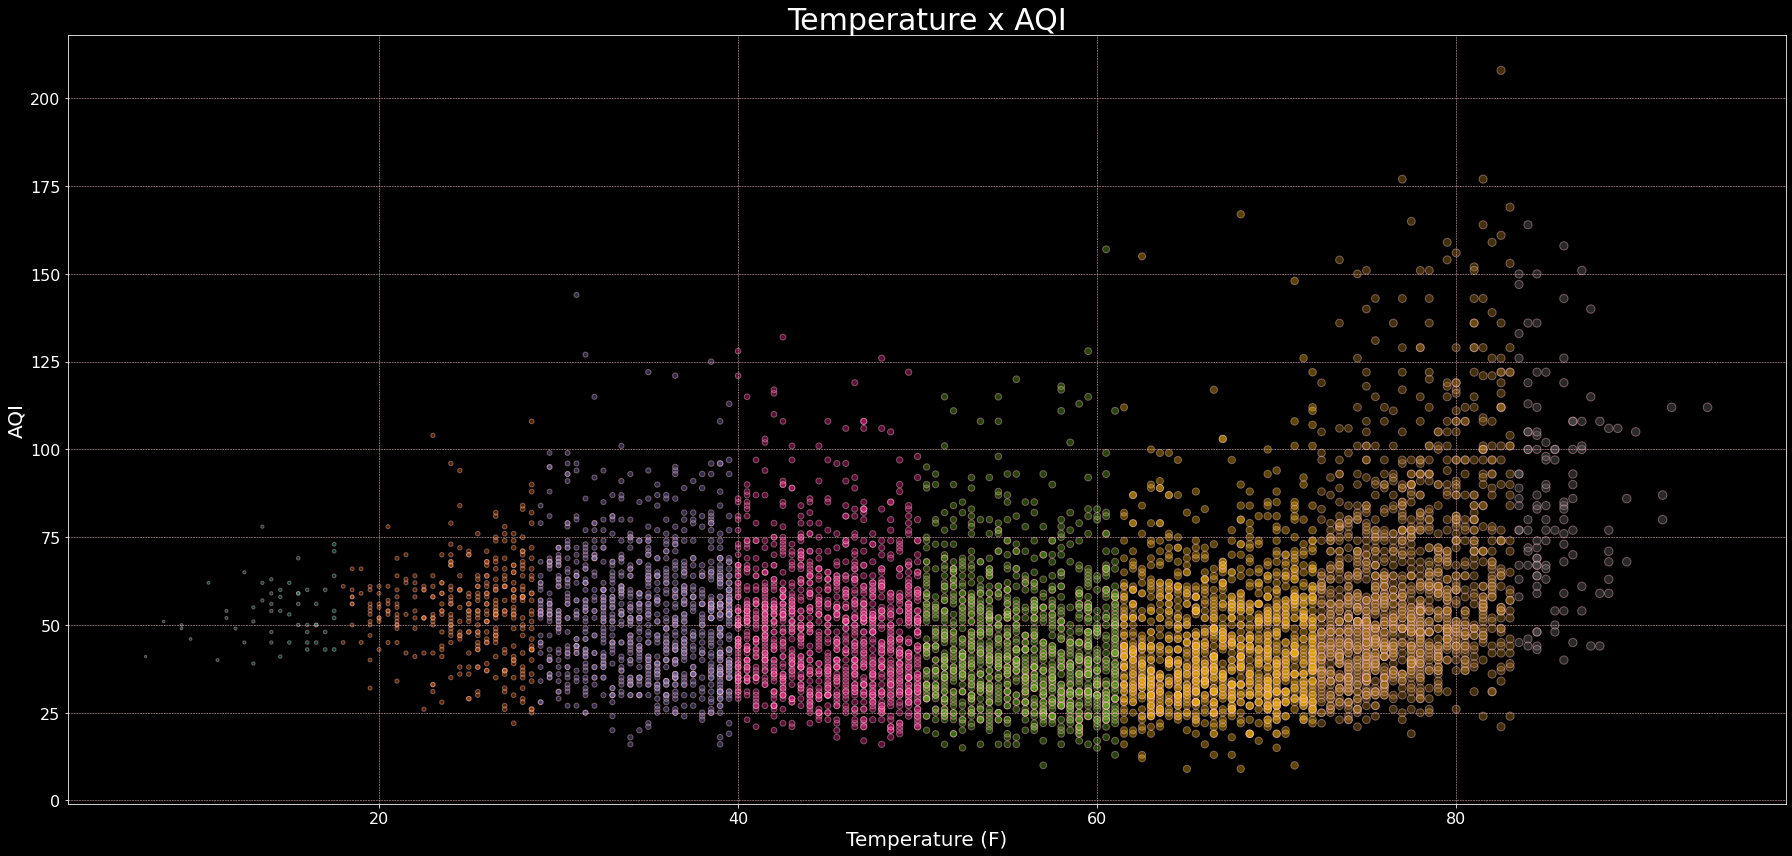

In [32]:
fig, ax = plt.subplots(figsize = (25, 12))

#months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

ax.scatter(df4.TempAvg, df4.AQI, s = (df4.TempAvg * .8),
    c = (df4.TempAvg * .8),
    #cmap = "inferno",
    cmap = "Dark2",
    #color = "yellow",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "pink"
)


ax.set_xlabel("Temperature (F)", fontsize = 20)
ax.set_ylabel("AQI", fontsize = 20)
ax.set_title("Temperature x AQI", fontsize = 30)

ax.grid(color= "pink", linestyle= '--', linewidth = .5)
ax.tick_params(axis = "x", labelsize=16)
ax.tick_params(axis='y', labelsize=16)

fig.tight_layout()

plt.show();


In [33]:
## Seasonal Plots | (Summer, Winter)

In [34]:
# fig, ax = plt.subplots(figsize = (40, 20))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 4),
#     c = (df4.TempMin * 4),
#     #cmap = "inferno_r",
#     #cmap = "autumn_r",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "red"
# )

# # ax.scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 4),
# #     c = (df4.TempMin * 4),
# #     cmap = "winter",
# #     alpha = 0.4,
# #     #linewidths = None,
# #     edgecolors = "blue"
# # )

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("Temperature (F)", fontsize = 20)
# ax.set_title("Temperature: Min x Max", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


## Plot: Temp (Max, Avg, Min) x PM Concentration

In [35]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.TempMax, df4["pm2.5"], s = (df4.TempMax * 4),
#     #c = (df4.TempMax * 4),
#     #cmap = "inferno_r",
#     #cmap = "autumn_r",
#     color = "red",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "blue"
# )

# ax.scatter(df4.TempAvg, df4["pm2.5"], s = (df4.TempAvg * 4),
#     #c = (df4.TempAvg * 4),
#     #cmap = "coolwarm",
#     color = "yellow",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "red"
# )

# ax.scatter(df4.TempMin, df4["pm2.5"], s = (df4.TempMin * 4),
#     #c = (df4.TempMin * 4),
#     #cmap = "winter",
#     color = "blue",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "pink"
# )

# ax.set_xlabel("Temperature (F)", fontsize = 20)
# ax.set_ylabel("PM Concentration (ug/m^3)", fontsize = 20)
# ax.set_title("Temperature x PM Concentration", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


## Plot: Temp (Max, Avg, Min) x PM Concentration (Switched Axis)

In [36]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4["pm2.5"], df4.TempMax,  s = (df4.TempMax * 4),
#     #c = (df4.TempMax * 4),
#     #cmap = "inferno_r",
#     #cmap = "autumn_r",
#     color = "red",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "blue"
# )

# ax.scatter(df4["pm2.5"], df4.TempAvg,  s = (df4.TempAvg * 4),
#     #c = (df4.TempAvg * 4),
#     #cmap = "coolwarm",
#     color = "yellow",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "red"
# )

# ax.scatter(df4["pm2.5"], df4.TempMin,  s = (df4.TempMin * 4),
#     #c = (df4.TempMin * 4),
#     #cmap = "winter",
#     color = "blue",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "pink"
# )

# ax.set_ylabel("Temperature (F)", fontsize = 20)
# ax.set_xlabel("PM Concentration (ug/m^3)", fontsize = 20)
# ax.set_title("Temperature x PM Concentration", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


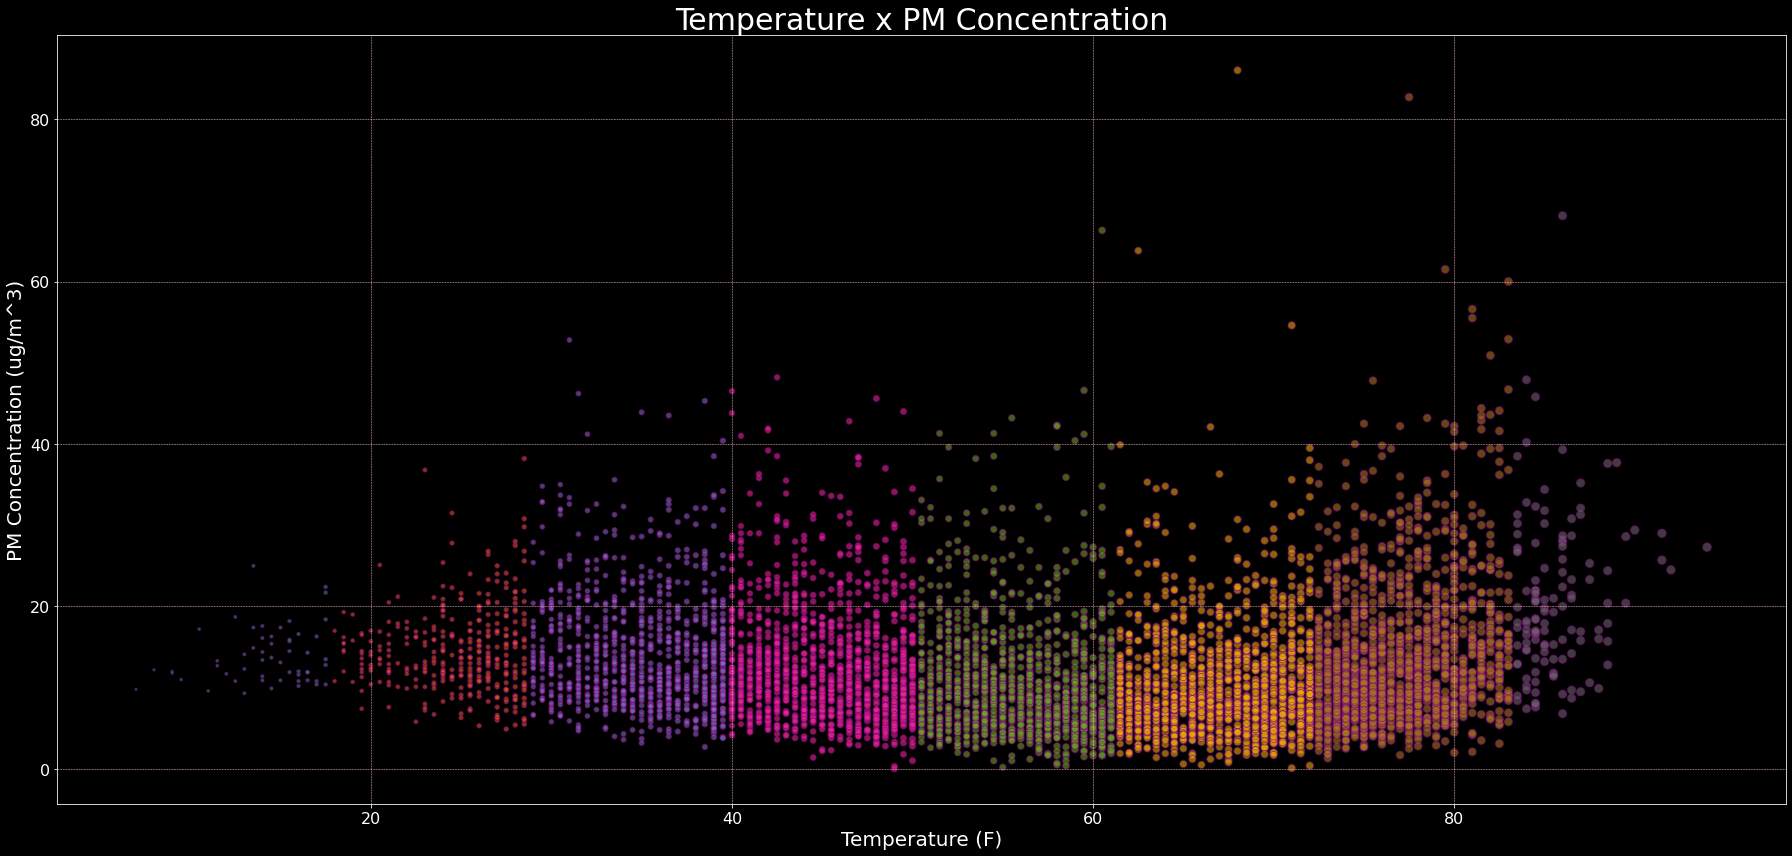

In [37]:

fig, ax = plt.subplots(figsize = (25, 12))

#months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

ax.scatter(df4.TempAvg, df4["pm2.5"], s = (df4.TempAvg * .8),
    c = (df4.TempAvg * .8),
    #cmap = "Purples_r",
    cmap = "Dark2",
    #cmap = "autumn_r",
    alpha = 0.6,
    #linewidths = None,
    edgecolors = "purple"
)


ax.set_xlabel("Temperature (F)", fontsize = 20)
ax.set_ylabel("PM Concentration (ug/m^3)", fontsize = 20)
ax.set_title("Temperature x PM Concentration", fontsize = 30)

ax.grid(color= "pink", linestyle= '--', linewidth = .5)
ax.tick_params(axis = "x", labelsize=16)
ax.tick_params(axis='y', labelsize=16)

fig.tight_layout()

plt.show();


## Plot: Temp (Min) x PM Concentration

In [38]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.TempMin, df4["pm2.5"], s = (df4.TempMin * 4),
#     c = (df4.TempMin * 4),
#     cmap = "winter_r",
#     #cmap = "autumn_r",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "red"
# )

# # ax.scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 4),
# #     c = (df4.TempMin * 4),
# #     cmap = "winter",
# #     alpha = 0.4,
# #     #linewidths = None,
# #     edgecolors = "blue"
# # )

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("Temperature (F)", fontsize = 20)
# ax.set_title("Min Temperature x PM Concentration", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


## Plot: Temp (Avg) x PM Concentration

In [39]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.TempAvg, df4["pm2.5"], s = (df4.TempAvg * 4),
#     c = (df4.TempAvg * 4),
#     #cmap = "inferno_r",
#     cmap = "coolwarm",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "blue"
# )

# # ax.scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 4),
# #     c = (df4.TempMin * 4),
# #     cmap = "winter",
# #     alpha = 0.4,
# #     #linewidths = None,
# #     edgecolors = "blue"
# # )

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("Temperature (F)", fontsize = 20)
# ax.set_title("Avg Temperature x PM Concentration", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


## Plot: Temp (Max) x PM Concentration

In [40]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.TempMax, df4["pm2.5"], s = (df4.TempAvg * 4),
#     c = (df4.TempAvg * 4),
#     cmap = "Reds",
#     #cmap = "autumn_r",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "red"
# )

# # ax.scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 4),
# #     c = (df4.TempMin * 4),
# #     cmap = "winter",
# #     alpha = 0.4,
# #     #linewidths = None,
# #     edgecolors = "blue"
# # )

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("Temperature (F)", fontsize = 20)
# ax.set_title("Max Temperature x PM Concentration", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();


## PLot: Three Column Temperature (Min, Avg, Max) x AQI

/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


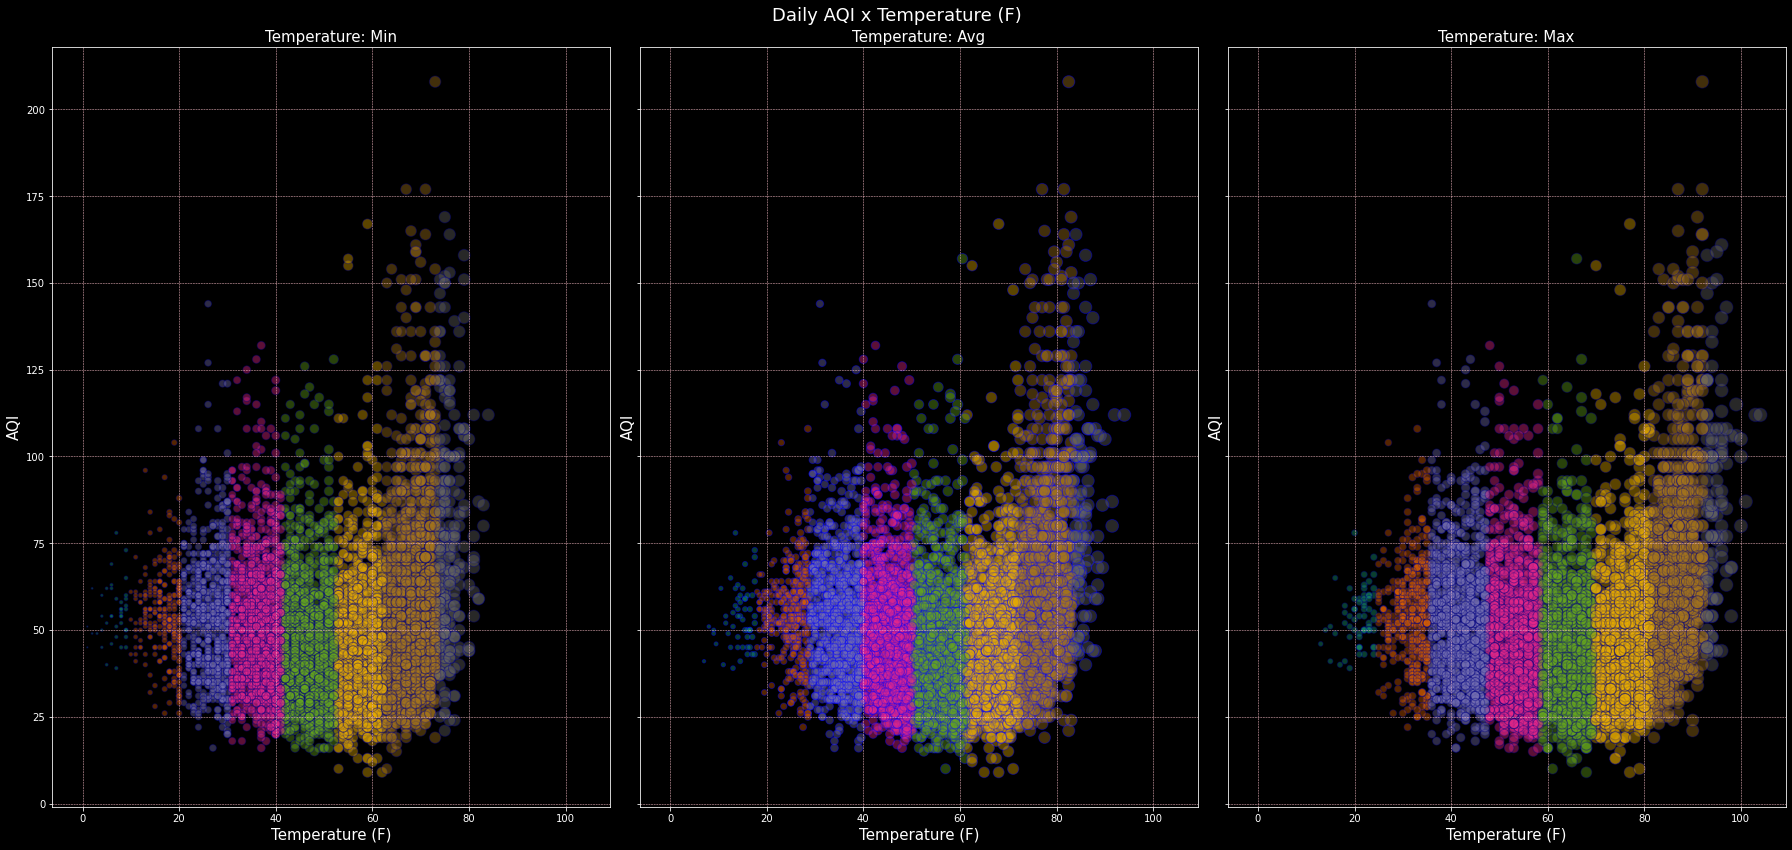

In [41]:

fig, ax = plt.subplots(1,3, figsize = (25, 12), sharex = True, sharey = True)#, squeeze = False)

fig.suptitle("Daily AQI x Temperature (F)", fontsize = 18)

fig.subplots_adjust(top=0.78)    

#############################################################################

ax[0].scatter(df4.TempMin, df4.AQI, s = (df4.TempMin * 1.8),
    c = (df4.TempMin * 4),
    #cmap = "inferno_r",
    #cmap = "autumn_r",
    #cmap = "coolwarm",
    cmap = "Dark2",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "navy"
)

ax[0].set_xlabel("Temperature (F)", fontsize = 15)
ax[0].set_ylabel("AQI", fontsize = 15)
ax[0].set_title("Temperature: Min", fontsize = 15)
ax[0].grid(color = "pink", linestyle= '--', linewidth = .5)


#############################################################################

ax[1].scatter(df4.TempAvg,  df4.AQI, s = (df4.TempAvg * 1.8),
    c = (df4.TempAvg * 1.8),
    cmap = "Dark2",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "blue",
)

ax[1].set_xlabel("Temperature (F)", fontsize = 15)
ax[1].set_ylabel("AQI", fontsize = 15)
ax[1].set_title('Temperature: Avg', fontsize = 15)
ax[1].grid(color = "pink", linestyle= '--', linewidth = .5)


#############################################################################


ax[2].scatter(df4.TempMax,  df4.AQI, s = (df4.TempMax * 1.8),
    c = (df4.TempMax * 1.8),
    cmap = "Dark2",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "navy",
)

ax[2].set_xlabel("Temperature (F)", fontsize = 15)
ax[2].set_ylabel("AQI", fontsize = 15)
ax[2].set_title("Temperature: Max", fontsize = 15)
ax[2].grid(color = "pink", linestyle= '--', linewidth = .5)

#############################################################################

plt.tight_layout()
plt.show()


## PLot: Three Column Temperature (Min, Avg, Max) x AQI

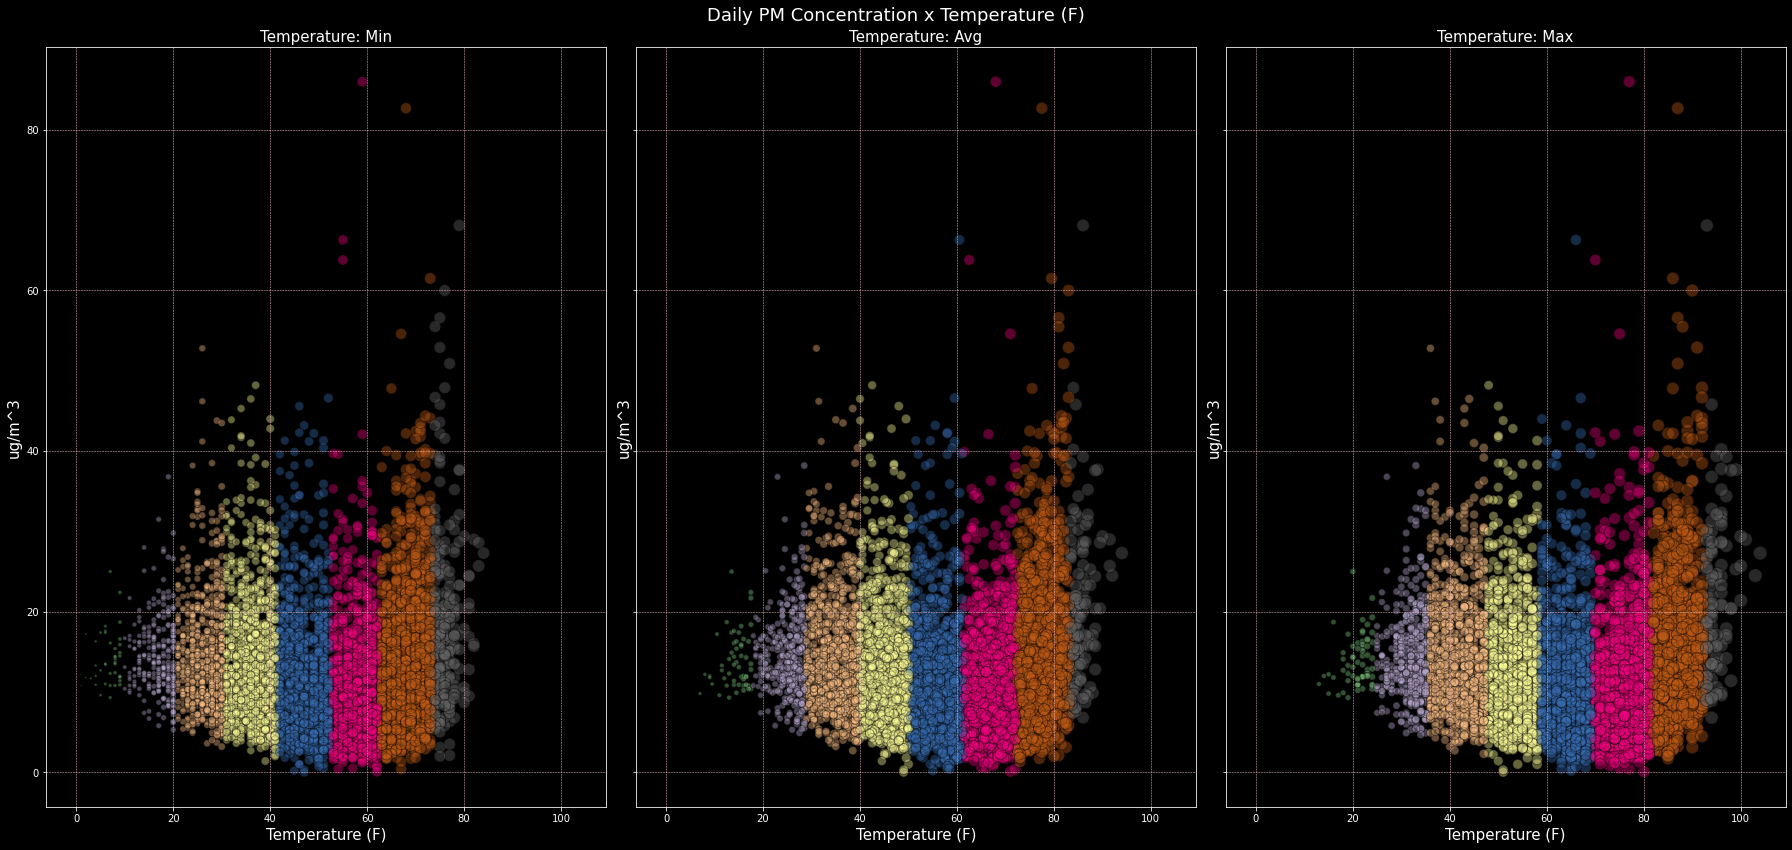

In [42]:

fig, ax = plt.subplots(1,3, figsize = (25, 12), sharex = True, sharey = True)#, squeeze = False)

fig.suptitle("Daily PM Concentration x Temperature (F)", fontsize = 18)

fig.subplots_adjust(top=0.78)    

#############################################################################

ax[0].scatter(df4.TempMin, df4["pm2.5"], s = (df4.TempMin * 1.8),
    c = (df4.TempMin * 4),
    #cmap = "inferno_r",
    cmap = "Accent",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "black"
)

ax[0].set_xlabel("Temperature (F)", fontsize = 15)
ax[0].set_ylabel("ug/m^3", fontsize = 15)
ax[0].set_title("Temperature: Min", fontsize = 15)
ax[0].grid(color = "pink", linestyle= '--', linewidth = .5)


#############################################################################

ax[1].scatter(df4.TempAvg, df4["pm2.5"], s = (df4.TempAvg * 1.8),
    c = (df4.TempAvg * 1.8),
    cmap = "Accent",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "k",
)

ax[1].set_xlabel("Temperature (F)", fontsize = 15)
ax[1].set_ylabel("ug/m^3", fontsize = 15)
ax[1].set_title('Temperature: Avg', fontsize = 15)
ax[1].grid(color = "pink", linestyle= '--', linewidth = .5)


#############################################################################


ax[2].scatter(df4.TempMax, df4["pm2.5"], s = (df4.TempMax * 1.8),
    c = (df4.TempMax * 1.8),
    cmap = "Accent",
    alpha = 0.4,
    #linewidths = None,
    edgecolors = "k",
)

ax[2].set_xlabel("Temperature (F)", fontsize = 15)
ax[2].set_ylabel("ug/m^3", fontsize = 15)
ax[2].set_title("Temperature: Max", fontsize = 15)
ax[2].grid(color = "pink", linestyle= '--', linewidth = .5)

#############################################################################

plt.tight_layout()
plt.show()


## 2D Histogram Three Column Temperature (Min, Avg, Max) x AQI

In [43]:

# fig, ax = plt.subplots(1,3, figsize = (25, 12), sharex = True, sharey = True)#, squeeze = False)

# fig.suptitle("Daily PM Concentration x Temperature (F)", fontsize = 18)

# fig.subplots_adjust(top=0.78)    

# #############################################################################

# ax[0].hist2d(df4.TempMin, df4["pm2.5"],
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"   
# )

# ax[0].set_xlabel("Temperature (F)", fontsize = 15)
# ax[0].set_ylabel("ug/m^3", fontsize = 15)
# ax[0].set_title("Temperature: Min", fontsize = 15)
# ax[0].grid(color = "pink", linestyle= '--', linewidth = .5)


# #############################################################################

# ax[1].hist2d(df4.TempAvg, df4["pm2.5"], 
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"  
# )

# ax[1].set_xlabel("Temperature (F)", fontsize = 15)
# ax[1].set_ylabel("ug/m^3", fontsize = 15)
# ax[1].set_title('Temperature: Avg', fontsize = 15)
# ax[1].grid(color = "pink", linestyle= '--', linewidth = .5)


# #############################################################################


# ax[2].hist2d(df4.TempMax, df4["pm2.5"], 
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"  
# )

# ax[2].set_xlabel("Temperature (F)", fontsize = 15)
# ax[2].set_ylabel("ug/m^3", fontsize = 15)
# ax[2].set_title("Temperature: Max", fontsize = 15)
# ax[2].grid(color = "pink", linestyle= '--', linewidth = .5)

# #############################################################################

# plt.tight_layout()
# plt.show()


In [44]:


# fig, ax = plt.subplots(1,3, figsize = (25, 12), sharex = True, sharey = True)#, squeeze = False)

# fig.suptitle("Daily PM Concentration x Temperature (F)", fontsize = 18)

# fig.subplots_adjust(top=0.78)    

# #############################################################################

# ax[0].hist2d(df4.TempMin, df4["AQI"],
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"   
# )

# ax[0].set_xlabel("Temperature (F)", fontsize = 15)
# ax[0].set_ylabel("AQI", fontsize = 15)
# ax[0].set_title("Temperature: Min", fontsize = 15)
# ax[0].grid(color = "pink", linestyle= '--', linewidth = .5)


# #############################################################################

# ax[1].hist2d(df4.TempAvg, df4["AQI"], 
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"  
# )

# ax[1].set_xlabel("Temperature (F)", fontsize = 15)
# ax[0].set_ylabel("AQI", fontsize = 15)
# ax[1].set_title('Temperature: Avg', fontsize = 15)
# ax[1].grid(color = "pink", linestyle= '--', linewidth = .5)


# #############################################################################


# ax[2].hist2d(df4.TempMax, df4["AQI"], 
#     bins = 10,
#     #color = "skyblue", 
#     ec = "skyblue",
#     lw = 1,
#     alpha = 0.8,
#     color = "black",
#     hatch = "-"  
# )

# ax[2].set_xlabel("Temperature (F)", fontsize = 15)
# ax[0].set_ylabel("AQI", fontsize = 15)
# ax[2].set_title("Temperature: Max", fontsize = 15)
# ax[2].grid(color = "pink", linestyle= '--', linewidth = .5)

# #############################################################################

# plt.tight_layout()
# plt.show()


## 3D Visualizations

In [45]:

# fig, ax = plt.subplots(1,2, figsize = (25, 12), sharex = True, sharey = True)#, squeeze = False)

# fig.suptitle("Daily PM Concentration x Temperature (F)", fontsize = 18)

# fig.subplots_adjust(top=0.78)    

# #############################################################################

# ax = plt.axes(projection = '3d')

# x = df4["pm2.5"]
# y =  df4.TempAvg
# z =  df4.Date


# ax[0].scatter(x, y, z, zdir= 'z', depthshade = True, s = (df4.TempAvg * .8),      
#     c = (df4.TempAvg * .8),
#     cmap = "Paired_r",
#     alpha = 0.7,
#     #linewidths = None,
#     edgecolors = "navy",)

# ax[0].set_xlabel('PM Concentration')
# ax[0].set_ylabel('Temperature')
# ax[0].set_zlabel('Date')
# ax[0].set_title('3D: Temperature, AQI, PM Concentration')

# #############################################################################

# ax[1].scatter(x, y, z, zdir= 'z', depthshade = True, s = (df4.TempAvg * .8),
#     c = (df4.TempAvg * .8),
#     cmap = "Paired_r",
#     alpha = 0.7,
#     #linewidths = None,
#     edgecolors = "navy",)

# ax[1].set_xlabel('PM Concentration')
# ax[1].set_ylabel('Temperature')
# ax[1].set_zlabel('Date')
# ax[1].set_title('3D: Temperature, AQI, PM Concentration')

# # ax[1].set_xlabel("Temperature (F)", fontsize = 15)
# # ax[1].set_ylabel("ug/m^3", fontsize = 15)
# # ax[1].set_title('Temperature: Avg', fontsize = 15)
# # ax[1].grid(color = "pink", linestyle= '--', linewidth = .5)


# #############################################################################

# plt.tight_layout()
# plt.show()


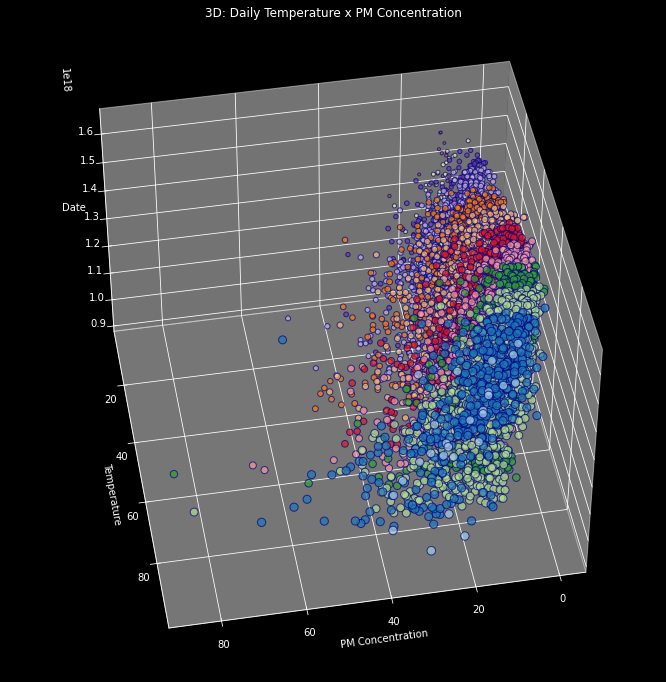

In [46]:

fig = plt.figure(figsize = (30, 12))

ax = plt.axes(projection = '3d')

x = df4["pm2.5"]
y =  df4.TempAvg
z =  df4.Date

ax.view_init(45, 80)

ax.scatter(x, y, z, zdir= 'z', depthshade = True, s = (df4.TempAvg * .8),
    c = (df4.TempAvg * .8),
    cmap = "Paired_r",
    alpha = 0.7,
    #linewidths = None,
    edgecolors = "navy",)

ax.set_xlabel('PM Concentration')
ax.set_ylabel('Temperature')
ax.set_zlabel('Date')
ax.set_title('3D: Daily Temperature x PM Concentration')

plt.show()


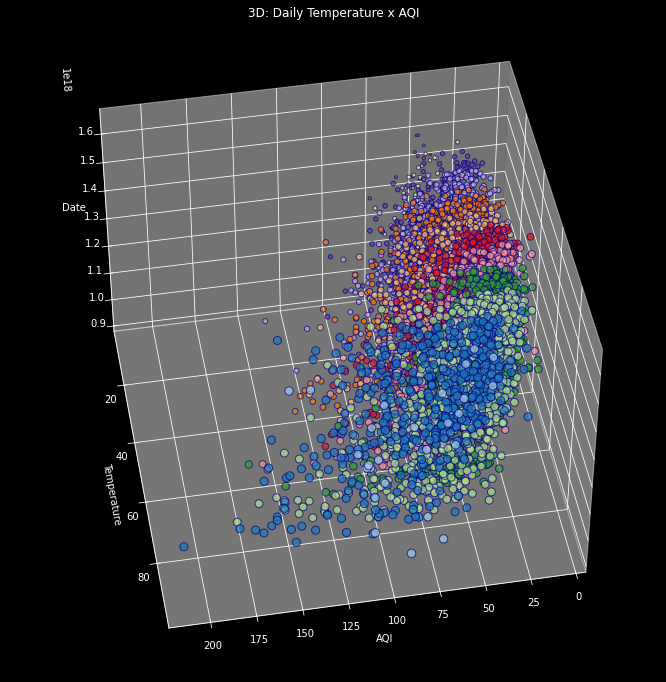

In [47]:

fig = plt.figure(figsize = (30, 12))

ax = plt.axes(projection = '3d')

x = df4.AQI
y =  df4.TempAvg
z =  df4.Date

ax.view_init(45, 80)

ax.scatter(x, y, z, zdir= 'z', depthshade = True, s = (df4.TempAvg * .8),
    c = (df4.TempAvg * .8),
    cmap = "Paired_r",
    alpha = 0.7,
    #linewidths = None,
    edgecolors = "navy",)

ax.set_xlabel('AQI')
ax.set_ylabel('Temperature')
ax.set_zlabel('Date')
ax.set_title('3D: Daily Temperature x AQI')

plt.show()


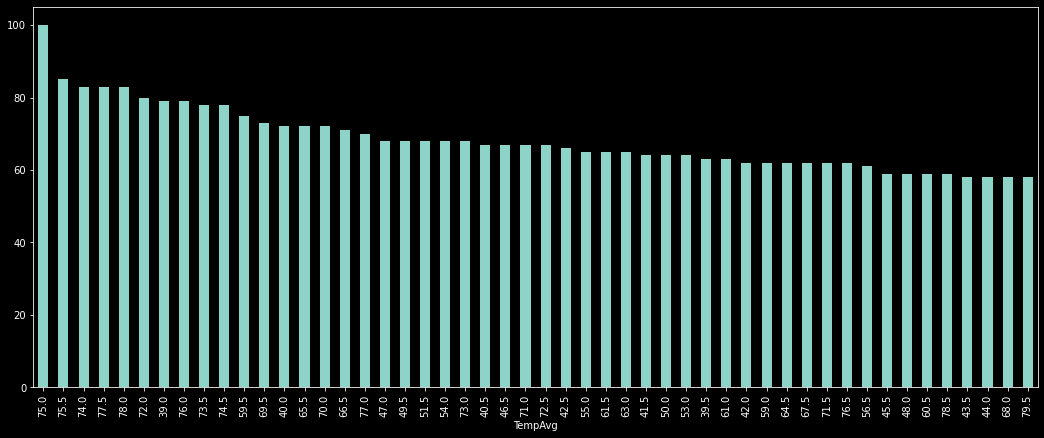

In [64]:
p = df4.groupby("TempAvg").AQI.count().nlargest(50).plot(kind = "bar", figsize = (18, 7));

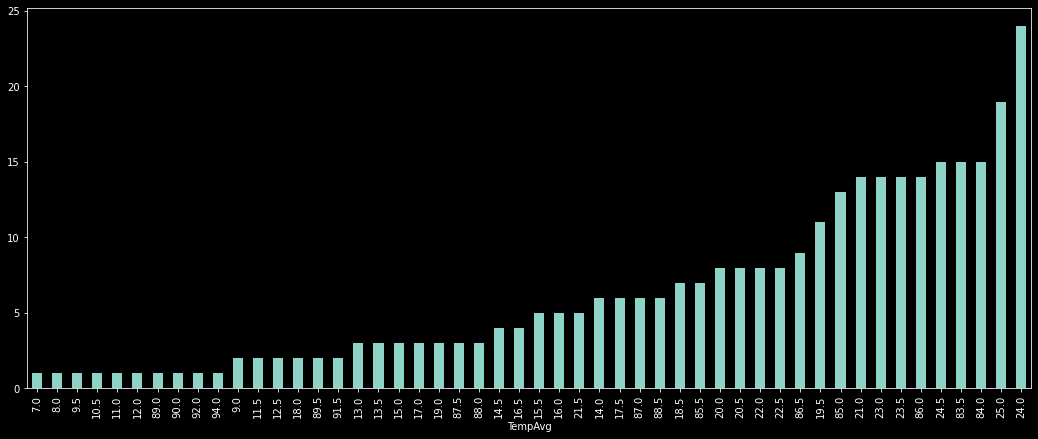

In [71]:
a = df4.groupby("TempAvg").AQI.count().nsmallest(50).plot(kind = "bar", figsize = (18, 7));

In [72]:
#d = df4.groupby("pm2.5").TempAvg.count().nlargest(50).plot(kind = "bar", figsize = (18, 7));

## GroupBy

In [48]:

# maxes = df4.groupby("TempMax");

# maxes.head()


In [49]:

# aqi = df4.groupby("AQI");

# aqi.head()


In [50]:
#p = df4.groupby("Date").TempAvg.count().nlargest(50).plot(kind = "bar", figsize = (12, 6));

## Series

In [51]:
# aqiS = pd.Series(df4["TempAvg"], index = df4.AQI)

In [52]:

#aqiS

In [53]:
#aqiS.plot(kind = "bar")

In [54]:
# fig, ax = plt.subplots(figsize = (25, 12))

# #months = pd.date_range(start = '1999-07-02', end='2021-10-31', freq='M')

# ax.scatter(df4.Date, aqiS, s = (aqiS * .4),
#     c = (aqiS * .4),
#     cmap = "inferno",
#     #cmap = "autumn_r",
#     alpha = 0.4,
#     #linewidths = None,
#     edgecolors = "red"
# )

# ax.set_xlabel("Date", fontsize = 20)
# ax.set_ylabel("AQI | Temperature", fontsize = 20)
# ax.set_title("Daily AQI x Temperature", fontsize = 30)

# ax.grid(color= "pink", linestyle= '--', linewidth = .5)
# ax.tick_params(axis = "x", labelsize=16)
# ax.tick_params(axis='y', labelsize=16)

# fig.tight_layout()

# plt.show();
